<a href="https://colab.research.google.com/github/bayloid/heart/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py
data = pd.read_csv('heart.csv')

In [ ]:
data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2,1
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1


In [ ]:
data.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholestrol', 'FastingBS','Resting_ecg','MaxHeartrate', 'ExerciseInducedAngina', 'STdepression', 'STslope', 'NumMajorVessels', 'thalliumTest', 'Condition']

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholestrol,FastingBS,Resting_ecg,MaxHeartrate,ExerciseInducedAngina,STdepression,STslope,NumMajorVessels,thalliumTest,Condition
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data Processing

In [ ]:
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholestrol,FastingBS,Resting_ecg,MaxHeartrate,ExerciseInducedAngina,STdepression,STslope,NumMajorVessels,thalliumTest,Condition
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.info()

print()
print(f'Shape of the dataset')
print(f'Number of features: {data.shape[1]}')
print(f'Number of observations: {data.shape[0]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Sex                    303 non-null    int64  
 2   ChestPainType          303 non-null    int64  
 3   RestingBP              303 non-null    int64  
 4   Cholestrol             303 non-null    int64  
 5   FastingBS              303 non-null    int64  
 6   Resting_ecg            303 non-null    int64  
 7   MaxHeartrate           303 non-null    int64  
 8   ExerciseInducedAngina  303 non-null    int64  
 9   STdepression           303 non-null    float64
 10  STslope                303 non-null    int64  
 11  NumMajorVessels        303 non-null    int64  
 12  thalliumTest           303 non-null    int64  
 13  Condition              303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB

Shape of t

In [ ]:
data.isnull().sum()

Age                      0
Sex                      0
ChestPainType            0
RestingBP                0
Cholestrol               0
FastingBS                0
Resting_ecg              0
MaxHeartrate             0
ExerciseInducedAngina    0
STdepression             0
STslope                  0
NumMajorVessels          0
thalliumTest             0
Condition                0
dtype: int64

Data Analysis

In [ ]:
def condition_ratio(data):
    """
    Make a pie chart of 'Condition' values
    Condition: 0 = Benign, 1 = Malignant
    """
    results = data['Condition'].value_counts()
    values = [results[0], results[1]]
    labels = ['Benign', 'Malignant']
    colors = ['MediumSeaGreen', 'Coral']
    
    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors, 
                             'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    return py
    
    
condition_ratio(data);

In [ ]:
def sex_ratio(data):
    """
    Make a pie chart of 'Sex' values
    Sex: 0 = Female, 1 = Male
    """
    # Pie chart of sex ratio
    results = data['Sex'].value_counts()
    values = [results[0], results[1]]
    labels = ['Female', 'Male']
    colors = ['Red', 'RoyalBlue']
    
    fig_pie = go.Pie(labels=labels, values=values, 
                     marker={'colors': colors, 
                             'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    return py

    
sex_ratio(data);

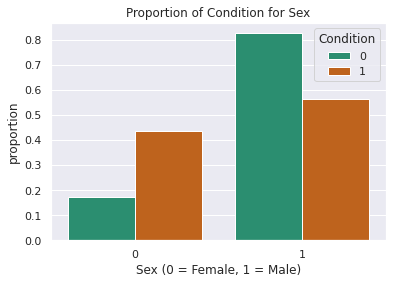

The proportion of Malignant for Sex:
Female: 43.64%
Male: 56.36%


In [ ]:
def condition_proportion_sex(data):
    """
    Plot a bar chart of the proportion of Conditon vs. Sex.
    Show the percentage of Malignant for each sex.
    """
    # Bivariate analysis: Sex vs. Condition          
    data['Sex'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Sex', y='proportion', hue='Condition', palette='Dark2');
    plt.title('Proportion of Condition for Sex')
    plt.xlabel('Sex (0 = Female, 1 = Male)')
    plt.show()
    
    
    # Show the percentage of Malignant for Sex
    # female_malignant vs. Malignant
    female_malignant = data[data['Sex']==0]['Condition'].sum()/data[data['Condition']==1]['Condition'].count()
    # male_malignant vs. Malignant
    male_malignant = data[data['Sex']==1]['Condition'].sum()/data[data['Condition']==1]['Condition'].count()

    print('The proportion of Malignant for Sex:')
    print(f'Female: {female_malignant:.2%}')
    print(f'Male: {male_malignant:.2%}')

    
condition_proportion_sex(data);